In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
df = pd.read_excel("online_retail_II.xlsx")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [177]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [178]:
df['Customer ID'] = df['Customer ID'].astype('Int64')

In [179]:
df.duplicated().sum()

6865

In [180]:
df = df.drop_duplicates()

### Q1: What is the average quantity of products sold per transaction?

In [182]:
avg_qty_transac = df.groupby('Invoice')['Quantity'].mean().reset_index(name = 'Avg_quantity').sort_values(by = 'Avg_quantity', ascending = False)
avg_qty_transac

,Invoice,Avg_quantity
6395,502269,10000.0
14338,518241,9600.0
4342,498152,9456.0
20565,530715,7848.0
6021,501534,6397.4
...,...,...
9241,507913,-9000.0
20354,530348,-9000.0
7401,504311,-9200.0
28692,C536757,-9360.0


### Q2: Find the median unit price of all products.

In [184]:
median_price = df['Price'].median()
print(median_price)

2.1


### Q3: Which country has the highest average invoice amount?

In [186]:
highest_avg_invoiceamount = df.groupby('Invoice')['Price'].mean().reset_index(name = 'Avg_price').sort_values(by = 'Avg_price', ascending = False).head(1)
highest_avg_invoiceamount

,Invoice,Avg_price
11724,512771,25111.09


### Q4: What is the standard deviation of quantity sold across all transactions?

In [188]:
std_quantity = df['Quantity'].std()
print(std_quantity)

108.12659284941847


### Q5: How many unique customers are there? What is their average purchase frequency?

In [190]:
unique_cust = df['Customer ID'].nunique()
print(unique_cust)

4383


In [191]:
df = df.dropna(subset = ['Customer ID'])

In [192]:
invoice_counts  = df.groupby('Customer ID')['Invoice'].nunique()
avg_purchase_frequency  = round(invoice_counts.mean(),2)
print(avg_purchase_frequency)

5.38


### Q6: Create a frequency distribution of transaction amounts (e.g., <10, 10–50, 50–100, >100).

In [194]:
df['Transaction_amount'] = df['Quantity'] * df['Price']

In [195]:
df_clean = df[df['Transaction_amount'] > 0]

In [196]:
bins = [0, 10, 50, 100, float('inf')]
labels = ['<10', '10-50', '50-100', '>100']

In [197]:
df_clean['Amount_range'] = pd.cut(df_clean['Transaction_amount'], bins = bins, labels = labels)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15004\3926493021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Amount_range'] = pd.cut(df_clean['Transaction_amount'], bins = bins, labels = labels)


In [198]:
freq_distribution  = df_clean['Amount_range'].value_counts().sort_index()
print(freq_distribution)

Amount_range
<10       170217
10-50     201505
50-100     17229
>100       11965
Name: count, dtype: int64


### Q7: Check if the Price column is right-skewed. Use skewness and histogram.

In [200]:
price_skew = df['Price'].skew()
print(price_skew)

182.46581635883905


In [201]:
df['Price'].isnull().sum()

0

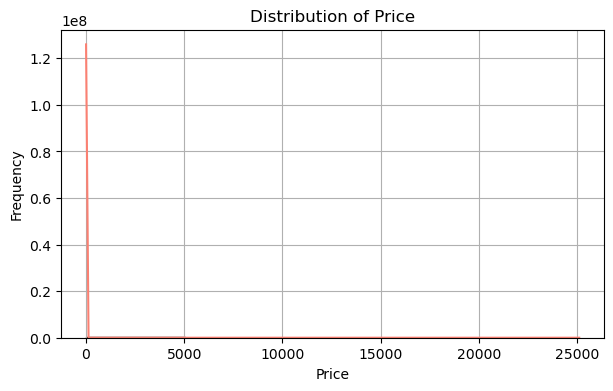

In [236]:
plt.figure(figsize = (7,4))
sns.histplot(df[df['Price'] > 0]['Price'], bins=5, kde=True, color='salmon')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Q8: Is Quantity normally distributed?

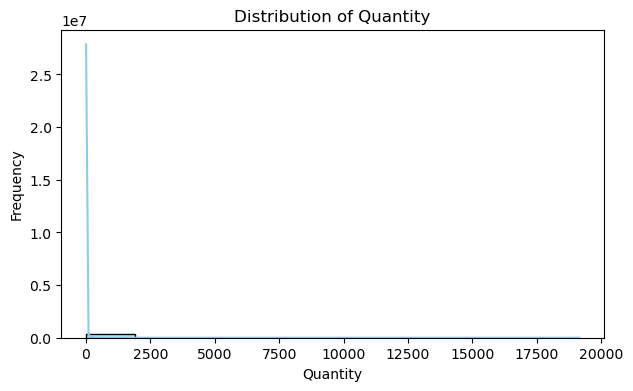

In [240]:
plt.figure(figsize = (7,4))
sns.histplot(df[df['Quantity'] > 0]['Quantity'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

### Q9: Identify outliers in Price and Quantity using the IQR method.

In [243]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


In [245]:
price_outliers = detect_outliers_iqr(df, 'Price')
print(f"Price outliers: {len(price_outliers)}")


Price outliers: 34703


In [247]:
quantity_outliers = detect_outliers_iqr(df, 'Quantity')
print(f"Quantity outliers: {len(quantity_outliers)}")

Quantity outliers: 27342


### Q10: Plot the distribution of invoice total amounts. Comment on shape, central tendency, and spread.

In [250]:
invoice_totals = df.groupby('Invoice')['Transaction_amount'].sum().reset_index()

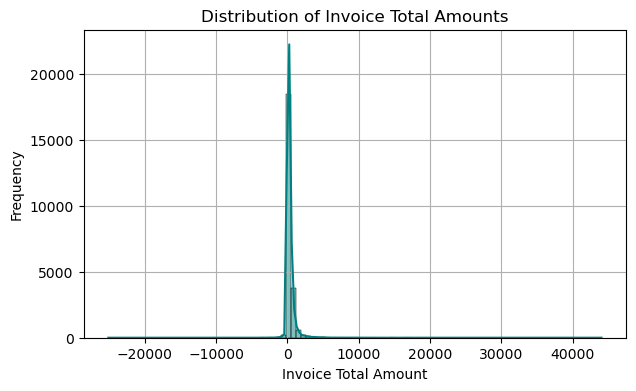

In [252]:
plt.figure(figsize=(7, 4))
sns.histplot(invoice_totals['Transaction_amount'], bins=100, kde=True, color='teal')
plt.title('Distribution of Invoice Total Amounts')
plt.xlabel('Invoice Total Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [254]:
mean_val = invoice_totals['Transaction_amount'].mean()
median_val = invoice_totals['Transaction_amount'].median()
std_dev = invoice_totals['Transaction_amount'].std()

In [258]:
print(mean_val)
print(median_val)
print(std_dev)

352.5185731123076
230.51
917.1479778893042
